In [143]:
import pandas as pd
import sklearn.decomposition
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [189]:
cities_of_choice = ['London']
Top = ['Beijing','Paris','Hong Kong','Chicago','Madrid','Osaka']

In [117]:
city_norm  = pd.read_csv('/Users/davidfan/Downloads/city_normalized (1).csv')

In [136]:
pca = sklearn.decomposition.PCA(n_components=3)

In [137]:
pca.fit(city_norm.drop("city", axis = 1))

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [138]:
pcs = pd.DataFrame(pca.fit_transform(city_norm.drop("city", axis = 1)))

In [139]:
pcs['name'] = city_norm.city

<bound method Axes.legend of <matplotlib.axes._subplots.Axes3DSubplot object at 0x138934470>>

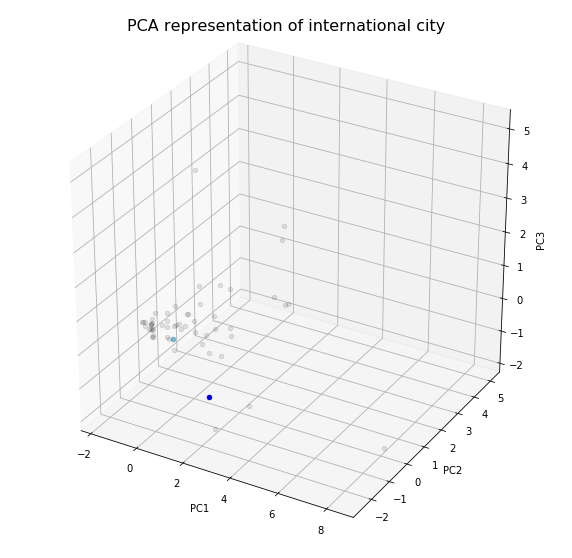

In [190]:
plt.rcParams['figure.figsize'] = (10,10)
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(len(pcs[0])):
    if pcs['name'][i] == 'London':
        ax.scatter(pcs[0][i],pcs[1][i],pcs[2][i], color = 'blue')
    elif pcs['name'][i] in Top:
        ax.scatter(pcs[0][i],pcs[1][i],pcs[2][i], color = 'skyblue')
    ax.scatter(pcs[0][i],pcs[1][i],pcs[2][i], color = 'black',alpha = 0.1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3',rotation=90)
ax.set_title('PCA representation of international city',pad = 20, size = 16)

ax.legend

In [132]:
city_norm.columns

Index(['city', 'population', 'Revenue (billion USD)', 'Employees',
       'City Area (km2)', 'Metro Population (millions)',
       'GDP Per Capita (thousands $, PPP rates, per resident)',
       'Higher Education Institutions'],
      dtype='object')

In [133]:
pcs['name'][np.argsort(np.sum(np.power(np.array(city_norm.drop(["city"], axis = 1))[pcs['name'] == 'London'] - 
np.array(city_norm.drop(["city"], axis = 1)),2),axis = 1))]

21            London
15             Paris
12           Beijing
20           Chicago
25         Hong Kong
37     San Francisco
27            Madrid
11             Osaka
29           Toronto
16             Seoul
28           Houston
55         Amsterdam
52            Zurich
24          Shenzhen
33            Sydney
30         Singapore
3             Mumbai
32            Boston
48         Stockholm
54            Dublin
10    Rio de Janeiro
42             Milan
35         Melbourne
40              Rome
26           Bangkok
38      Johannesburg
13            Manila
7            Kolkata
4          Sao Paulo
43            Vienna
51          Helsinki
41            Athens
9              Cairo
17             Lagos
53        Copenhagen
23            Bogota
31         Barcelona
36            Ankara
39            Berlin
49            Geneva
44         Vancouver
56              Oslo
50            Prague
46            Warsaw
2        Mexico City
22              Lima
18           Jakarta
19         Gu

In [90]:
pcs[(pcs[0] > 0) & (pcs[1] < 0)]

,0,1,name
1,6.691752,-1.935491,New York
8,0.885621,-0.729328,Los Angeles
12,3.966797,-0.946804,Beijing
15,4.456426,-2.836057,Paris
20,0.508514,-0.044841,Chicago
21,2.596407,-1.546145,London
